<a href="https://colab.research.google.com/github/harnalashok/databases/blob/main/1.Why_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why Database?

## Problems with Excel
Refer Excel file: `superstore_sales_data.xls` in Virtual Machine, `ubuntu_databases` in folder:  
    `/home/ashok/Documents/excel_data/`

* <b>Spelling Errors</b>: Same data (eg 'partName') may be spelled  differently in different Excel books.

* <b>Linking workbooks not possible</b>: Linking of Excel WorkBooks is not possible or easy. Therefore, to answer all types of questions about any  entity, such as a Student, we must have all data about the Student in one Excel sheet only. For example to get an answer to question "*Have those students who have scored 70% or above marks in HR and Computers have paid their full fees uptil now?*", we may have his marks data as also his fees data in one Excel Sheet only. This will make Excel Sheet very cumbersome; it will also lead to duplication of data. Imagine an Excel sheet that stores data about Students' admissions, thier accounts, their performance, their extra-curricular activities etc.  
* <b>No language(DML)</b>: Even if it were a simple, single Excel Sheet, the only way to look for information is to search for it. No simple language is available to extract information from an Excel Sheet.  
* <b>Updation</b>: No simple way to update information. Suppose a course name has changed. We must update every cell of the sheet where this course name occurs.  
* <b>Security</b>: Excel has no security model. Anyone who can read a sheet can also modify or delete it.  
* <b>Big data/Scalability</b>: Excel is OK for few columns and for around 100 records. But what is the number of records are many thousands and the number of columns are also huge? The sheet becomes very clumsy and difficult to handle or work with.


### A simple Excel program

```

Sub DeleteEmptyRows()
    SelectedRange = Selection.Rows.Count
    ActiveCell.Offset(0, 0).Select
    For i = 1 To SelectedRange
        If ActiveCell.Value = "" Then
            Selection.EntireRow.Delete
        Else
            ActiveCell.Offset(1, 0).Select
        End If
    Next i
End Sub

```

### Equivalent SQL program

```
DELETE FROM mytable WHERE customerID IS NULL ;

```

## Problems with flat files:

Flat files can be MS Excel files or just text files
<body font = 6px> AdventureWorks Sales.xlsx: D:\data\OneDrive\Documents\MicrosoftPowerBI\tutorial</body>

![image.png](attachment:97886c81-4a39-4725-a1e1-3eef28cb8513.png)

**File incompatibility**: Different departments may need data arranged differently in each file. For example, data might need to be sorted in a different sequence for different applications (for instance, customer details could be stored in alphabetical order, or numerical order, or ascending or descending order of customer number).

**Difficult to control access**: Some applications may require access to more data than others; for instance, a credit control application will need access to customer credit limit information, whereas a delivery note printing application will only need access to customer name and address details. The file will still need to contain the additional information to support the application that requires it.

**Difficult to implement concurrency**: While a data file is being processed by one application, the file will not be available for other applications or for ad hoc queries. This is because, if more than one application is allowed to alter data in a file at one time, serious problems can arise in ensuring that the updates made by each application do not clash with one another. This issue of ensuring consistent, concurrent updating of information is an extremely important one, and is dealt with in detail for database systems in the chapter on concurrency control. File-based systems avoid these problems by not allowing more than one application to access a file at one time.

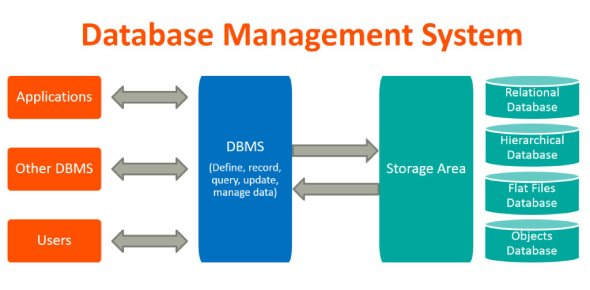

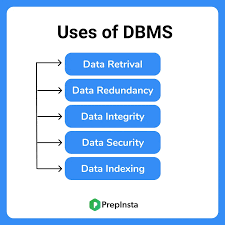

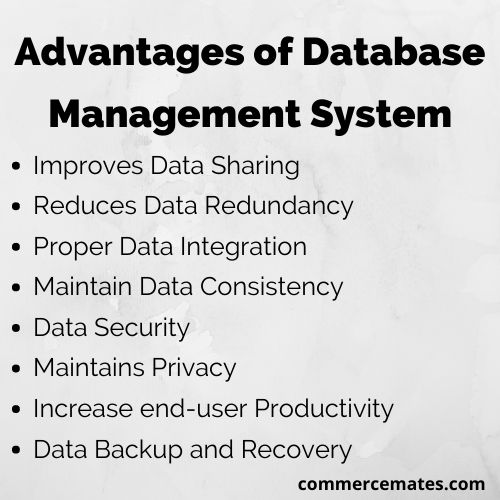

## Database Approach

* 1.Database: A database is a collection of related data arranged in a tabular format.

* 2.Database management system (DBMS): The term 'database management system', often abbreviated to DBMS, refers to a software system used to create and manage databases. The software of such systems is complex, consisting of a number of different components, which are described later in this chapter. The term database system is usually an alternative term for database management system.

* 3.Data dictionary: The description of the data in the DBMS. (also called system catalogue or information_schema). It may also have access information.

* 4.Database application: Database application refers to a program, or related set of programs, which use the database management system to perform the computer-related tasks of a particular business function, such as order processing.

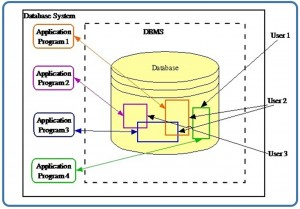

## Three level architecture
Schema can be taken to mean set of fields

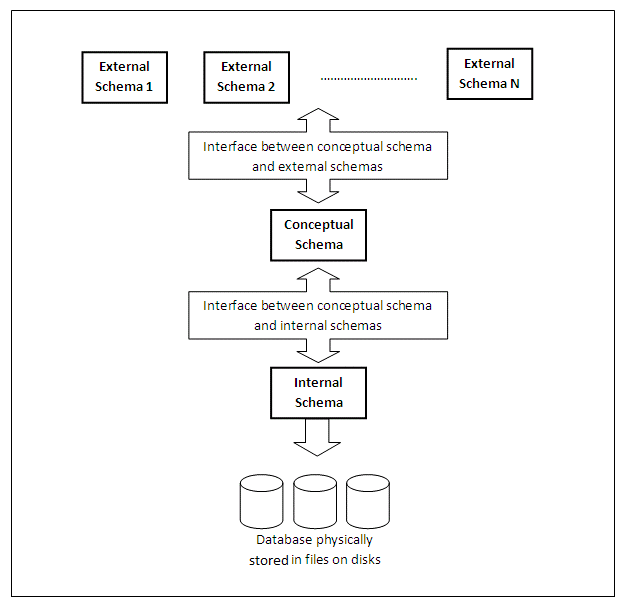

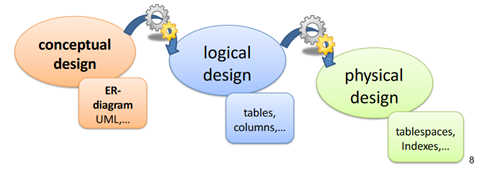

The external schema  
> The external schemas describe the database as it is seen by the user, and the user applications. Example: user1: [studentName, avgMarks], user2: [studentName, minMarks], user3: [studentName, subjectWiseMarks] - The external schema maps onto the conceptual schema, which is described below.

> There may be many external schemas, each reflecting a simplified model of the world, as seen by particular applications. External schemas may be modified, or new ones created, without the need to make alterations to the physical storage of data. The interface between the external schema and the conceptual schema can be amended to accommodate any such changes.

> The external schema allows the application programs to see as much of the data as they require, while excluding other items that are not relevant to that application. In this way, the external schema provides a view of the data that corresponds to the nature of each task.

> The external schema is more than a subset of the conceptual schema. While items in the external schema must be derivable from the conceptual schema, this could be a complicated process, involving computation and other activities.

The conceptual schema  
> The conceptual schema describes the **universe of interest** to the **users** of the database system. For a company, for example, it would provide a description of **all** of the data required to be stored in a database system. From this organisation-wide description of the data, external schemas can be derived to provide the data for specific users or to support particular tasks.

> At the level of the conceptual schema we are concerned with the data itself, rather than storage or the way data is physically accessed on disk. The definition of storage and access details is the preserve of the internal schema.

The internal schema  
>A database will have only one internal schema, which contains definitions of the way in which data is physically stored. The interface between the internal schema and the conceptual schema identifies how an element (for example, an integer) in the conceptual schema is stored, and how it may be accessed.

> If the internal schema is changed, this will need to be addressed in the interface between the internal and the conceptual schemas, but the conceptual and external schemas will not need to change. This means that changes in physical storage devices such as disks, and changes in the way files are organised on storage devices, are transparent to users and application programs.

>In distinguishing between 'logical' and 'physical' views of a system, it should be noted that the difference could depend on the nature of the user. While 'logical' describes the user angle, and 'physical' relates to the computer view, database designers may regard relations (for staff records) as logical and the database itself as physical. This may contrast with the perspective of a systems programmer, who may consider data files as logical in concept, but their implementation on magnetic disks in cylinders, tracks and sectors as physical.


## Data Independence

> Consider first the opposite case of data dependence. There are two files--one an index (file1) with a pointer and another a data table (file2). We want to know the salary of 'cairon'.  
The answer is dependent upon the knowledge of an index-file existing: opening first the index file, reading that index-file top-down till we encounter the name 'cairon'. At this point, read *rowno* value.  
Then, open data-table file, goto *rowno* discovered above and read salary.

> Our approach of discovering salary of 'cairon' will change if the index file were created on '*age*' rather than on '*name*'. Thus, there is dependence in the way files are stored/arranged.  


But in a dbms environment, dbms takes care of physical storage details. All that one has to write is a query (something like this):  

> *get salary of person whose name is 'cairon'*

file1

|name|rowNo|
|---|---|
|ashish|5|
|bhim|2|
|cairon|4|
|dany|1|
|eska|3|


file2


|name|age|salary|  
|---|---|---|
|dany|23|10k|
|bhim|25|09k|
|eska|40|30k|
|cairon|45|56k|
|ashish|35|32k|  



Pseudo-code

>**Open file1**  
>rowno = 1   

>begin loop  
>>read row at rowno:   
>>name := read name   
>>target := read rowNo     
>>if name = 'cairon' break loop  
>>else rowno = rowno +1  

>loop  

>**Open file2**   
>goto target  
>read salary  



Physical data independence  
>In a database environment, if there is a requirement to change the structure of a particular file of data held on disk, this will be recorded in the internal schema. The interface between the internal schema and the conceptual schema will be amended to reflect this, but there will be no need to change the external schema. This means that any such change of physical data storage is not transparent to users and application programs. This approach removes the problem of physical data dependence.

Logical data independence  
>Any changes to the conceptual schema (for example 'float' to 'double') can be isolated from the external schema and the internal schema; such changes will be reflected in the interface between the conceptual schema and the other levels. This achieves logical data independence. What this means, effectively, is that changes can be made at the conceptual level, where the overall model of an organisation's data is specified, and these changes can be made independently of both the physical storage level, and the external level seen by individual users. The changes are handled by the interfaces between the conceptual, middle layer, and the physical and external layers.

## Actors on the Scene
Ref: Page 15 of [the book](https://moodle.fsm.ac.in/moodle/mod/resource/view.php?id=2709)


## Data Adminsitrator

Data being one of the most valuable assets, there should be a person. who has a good knowldege of the Company, its divisions and what all data they process. He understands the importance of data flowing through various units, knows their security implications and decides what data should be stored in the database. He is a non-technical person, rather a business analyst. Lays down security and access policies.

### Database Administrators

* Coordinates all activities of a DBMS  
* Understanding user requirements and defining Database structure (also called Schema)  
* Storage structure  
* Defining user roles and granting privileges  
* Specifying integrity constraints  
* Monitoring performance and respoding to changing transaction volume or requiurements  
* Backup and Recovery  
* Securing database








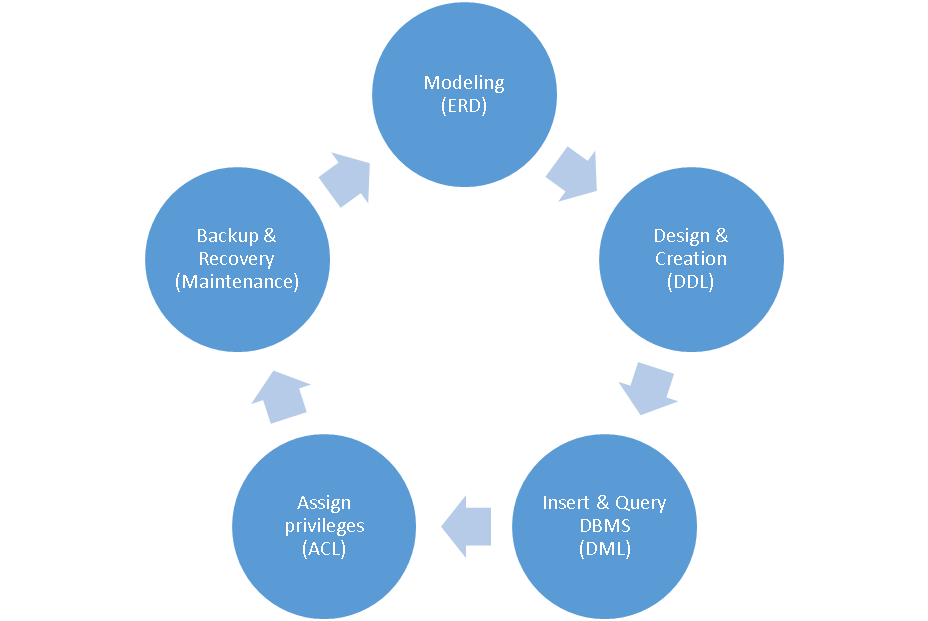

In [ ]:
################